In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
fashon_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashon_mnist.load_data()

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
len(train_labels)

60000

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
train_images = train_images / 255.0
test_images = test_images / 255.0

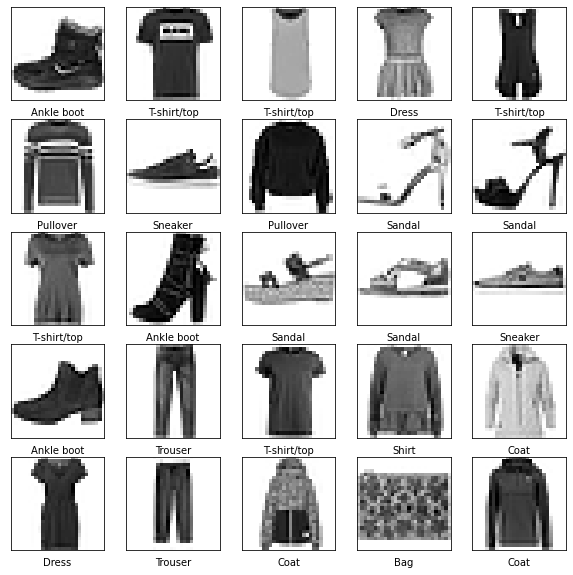

In [10]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [12]:
model.compile(optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
    )

In [13]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4990 - accuracy: 0.8248
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3740 - accuracy: 0.8650
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3378 - accuracy: 0.8758
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3147 - accuracy: 0.8848
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2960 - accuracy: 0.8901
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2816 - accuracy: 0.8951
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2683 - accuracy: 0.8991
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2595 - accuracy: 0.9031
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2498 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.240

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest accuracy: ", test_acc)

313/313 - 0s - loss: 0.3627 - accuracy: 0.8768 - 378ms/epoch - 1ms/step

Test accuracy:  0.876800000667572


In [15]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]

313/313 [==============================] - 0s 865us/step


array([1.2184165e-07, 3.2896866e-11, 1.7624467e-09, 1.0081640e-08,
       1.0729209e-08, 1.1449507e-04, 1.4289959e-07, 1.4383633e-02,
       2.6131919e-09, 9.8550159e-01], dtype=float32)

In [18]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)

    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100 * np.max(predictions_array), 
                                        class_names[true_label], color=color))

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])

    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color("blue")


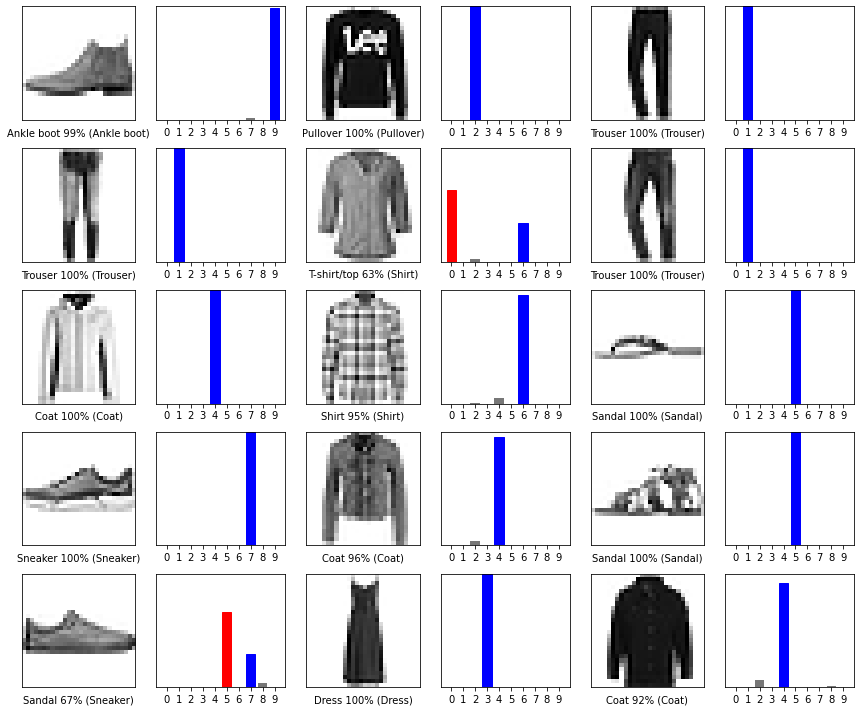

In [19]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()